# Military Spending DataSet from Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ONE_BILLION = 1e09

In [3]:
kaggle_file = './data/Military_Expenditure.csv'
df = pd.read_csv(kaggle_file)

In [4]:
df.head()

,Name,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,2.518695e+08,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08
2,Angola,AGO,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,3.311193e+09,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09
3,Albania,ALB,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08
4,Andorra,AND,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(264, 63)

In [6]:
df['Type'].value_counts()

Country                           202
Regions Clubbed Economically       33
Semi Autonomous Region             18
Regions Clubbed Geographically     11
Name: Type, dtype: int64

In [7]:
df['Indicator Name'].value_counts()

Military expenditure (current USD)    264
Name: Indicator Name, dtype: int64

In [8]:
df.columns

Index(['Name', 'Code', 'Type', 'Indicator Name', '1960', '1961', '1962',
       '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'],
      dtype='object')

In [9]:
df.drop(['Indicator Name'],axis='columns', inplace=True)

In [10]:
df_countries = df[df['Type'] == 'Country']
df_countries = df_countries.fillna(0)
df_countries.drop(['Type'], axis='columns', inplace=True)
df_countries.head()

,Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,Afghanistan,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.518695e+08,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08
2,Angola,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.311193e+09,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09
3,Albania,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08
4,Andorra,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [11]:
numeric_columns = [ col for col in list(df_countries.columns) if col.isdigit()]
df_countries[numeric_columns] = df_countries[numeric_columns] / ONE_BILLION
df_countries.drop(['Code'], axis='columns', inplace=True)
df_countries.set_index('Name', inplace=True)
df_countries = df_countries.T
df_countries.head()

Name,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,...,St. Vincent and the Grenadines,Venezuela,Vietnam,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.45976,...,0.0,0.234358,0.0,0.0,0.0,0.0,0.0,0.07000,0.0,0.0
1961,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.47096,...,0.0,0.114633,0.0,0.0,0.0,0.0,0.0,0.11375,0.0,0.0
1962,0.0,0.0,0.0,0.0,0.0,0.0,0.305162,0.0,0.0,0.48944,...,0.0,0.203901,0.0,0.0,0.0,0.0,0.0,0.18620,0.0,0.0
1963,0.0,0.0,0.0,0.0,0.0,0.0,0.242220,0.0,0.0,0.55328,...,0.0,0.245397,0.0,0.0,0.0,0.0,0.0,0.18900,0.0,0.0
1964,0.0,0.0,0.0,0.0,0.0,0.0,0.245740,0.0,0.0,0.65576,...,0.0,0.200460,0.0,0.0,0.0,0.0,0.0,0.27160,0.0,0.0


In [12]:
print(list(df_countries.columns))

['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Gibraltar', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Grenada', 'Greenland', 'Guatemala', 'Guam', 'Guyana', 'Hon

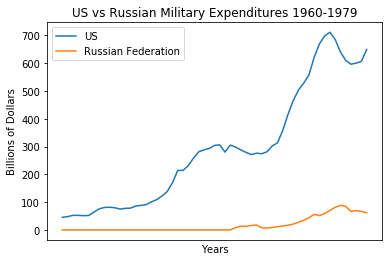

In [24]:
plt.plot(df_countries['United States'], label='US')
plt.plot(df_countries['Russian Federation'], label='Russian Federation')
plt.title('US vs Russian Military Expenditures 1960-1979')
plt.xlabel('Years')
plt.ylabel('Billions of Dollars')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.legend();